In [1]:
#importing libraries for project

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing the files to pandas dataframe from device

file_path1=r"/home/ibrahim/Downloads/DP_LIVE_30112023045815255.csv"
file_path2=r"/home/ibrahim/Downloads/DP_LIVE_30112023045847413.csv"
file_path3=r"/home/ibrahim/Downloads/DP_LIVE_30112023045926836.csv"
df_enrg=pd.read_csv(file_path1,parse_dates=True)
df_trans=pd.read_csv(file_path2,parse_dates=True)
df_emp=pd.read_csv(file_path3,parse_dates=True)

In [3]:
#changing column names to convention

import data_tools as dt

df_enrg.columns=dt.df_col(df_enrg.columns)
df_trans.columns=dt.df_col(df_trans.columns)
df_emp.columns=dt.df_col(df_emp.columns)

In [4]:
df_enrg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    6973 non-null   object 
 1   indicator   6973 non-null   object 
 2   subject     6973 non-null   object 
 3   measure     6973 non-null   object 
 4   frequency   6973 non-null   object 
 5   time        6973 non-null   int64  
 6   value       5321 non-null   float64
 7   flag_codes  1669 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 435.9+ KB


In [5]:
df_enrg.head()

,location,indicator,subject,measure,frequency,time,value,flag_codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.0,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.0,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.0,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.0,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.0,NaN


In [6]:
df_enrg["location"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'OEU', 'CHL', 'EST', 'ISR', 'SVN', 'OECD',
       'RUS', 'BRA', 'WLD', 'CHN', 'IDN', 'ZAF', 'IND', 'EU28', 'LVA',
       'LTU', 'ALB', 'BIH', 'BGR', 'COL', 'HRV', 'CYP', 'GEO', 'MLT',
       'MDA', 'ROU', 'UKR', 'SRB', 'MNE', 'CRI', 'MKD', 'EU27_2020'],
      dtype=object)

In [7]:
df_enrg.describe()

,time,value
count,6973.000000,5.321000e+03
mean,1991.141833,2.281110e+05
std,18.218595,9.138955e+05
min,1960.000000,0.000000e+00
25%,1975.000000,0.000000e+00
50%,1991.000000,1.004600e+04
75%,2007.000000,6.850900e+04
max,2022.000000,1.086010e+07


In [8]:
df_enrg["subject"].unique()

array(['NUCLEAR', 'TOT'], dtype=object)

In [9]:
df_enrg["indicator"].unique()

array(['ELECTRICITY'], dtype=object)

In [10]:
df_enrg["measure"].unique()

array(['GWH', 'PC_ENRGGEN'], dtype=object)

In [11]:
df_enrg["frequency"].unique()

array(['A'], dtype=object)

In [12]:
df_aus=df_enrg[df_enrg["location"]=="AUS"]

In [13]:
df_aus

,location,indicator,subject,measure,frequency,time,value,flag_codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.000,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.000,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.000,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.000,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.000,NaN
...,...,...,...,...,...,...,...,...
122,AUS,ELECTRICITY,TOT,GWH,A,2019,250530.937,NaN
123,AUS,ELECTRICITY,TOT,GWH,A,2020,251913.481,NaN
124,AUS,ELECTRICITY,TOT,GWH,A,2021,252505.422,NaN
125,AUS,ELECTRICITY,TOT,GWH,A,2022,NaN,L


In [14]:
df_enrg[df_enrg["subject"]=="NUCLEAR"]

,location,indicator,subject,measure,frequency,time,value,flag_codes
0,AUS,ELECTRICITY,NUCLEAR,GWH,A,1960,0.000,NaN
1,AUS,ELECTRICITY,NUCLEAR,GWH,A,1961,0.000,NaN
2,AUS,ELECTRICITY,NUCLEAR,GWH,A,1962,0.000,NaN
3,AUS,ELECTRICITY,NUCLEAR,GWH,A,1963,0.000,NaN
4,AUS,ELECTRICITY,NUCLEAR,GWH,A,1964,0.000,NaN
...,...,...,...,...,...,...,...,...
6905,EU27_2020,ELECTRICITY,NUCLEAR,GWH,A,2018,724552.433,NaN
6906,EU27_2020,ELECTRICITY,NUCLEAR,GWH,A,2019,728275.117,NaN
6907,EU27_2020,ELECTRICITY,NUCLEAR,GWH,A,2020,648379.652,NaN
6908,EU27_2020,ELECTRICITY,NUCLEAR,GWH,A,2021,695509.902,NaN


In [15]:
df_enrg[df_enrg["subject"]=="TOT"]

,location,indicator,subject,measure,frequency,time,value,flag_codes
63,AUS,ELECTRICITY,TOT,GWH,A,1960,0.000,NaN
64,AUS,ELECTRICITY,TOT,GWH,A,1961,0.000,NaN
65,AUS,ELECTRICITY,TOT,GWH,A,1962,0.000,NaN
66,AUS,ELECTRICITY,TOT,GWH,A,1963,0.000,NaN
67,AUS,ELECTRICITY,TOT,GWH,A,1964,0.000,NaN
...,...,...,...,...,...,...,...,...
6968,EU27_2020,ELECTRICITY,TOT,GWH,A,2018,2802394.524,NaN
6969,EU27_2020,ELECTRICITY,TOT,GWH,A,2019,2776074.250,NaN
6970,EU27_2020,ELECTRICITY,TOT,GWH,A,2020,2667709.691,NaN
6971,EU27_2020,ELECTRICITY,TOT,GWH,A,2021,2784613.586,NaN


In [16]:
df_aus[df_aus["value"]==0]=np.NaN

/tmp/ipykernel_9823/33029380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aus[df_aus["value"]==0]=np.NaN


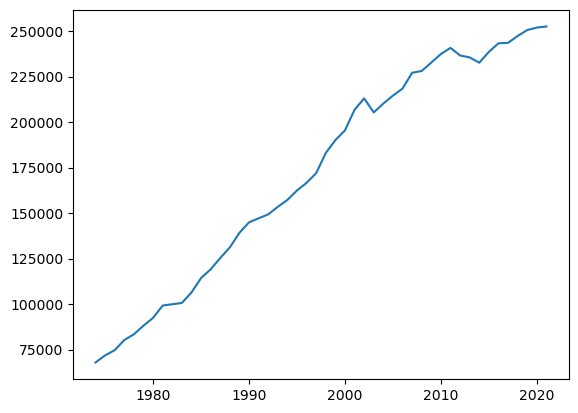

In [17]:
plt.plot(df_aus["time"],df_aus["value"])

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df_aus)

ValueError: could not convert string to float: 'AUS'

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf


fig,ax=plt.subplots(3,2,sharex=True)
ax[0,0].plot(df_aus.value)
ax[0,0].set_title("Original Values")
plot_acf(df_aus["value"],ax=ax[0,1])

ax[1,0].plot(df_aus.value.diff().dropna())
ax[1,0].set_title("Order of Differencing: First")
plot_acf(df_aus.value.diff().dropna(),ax=ax[1,1])


ax[2,0].plot(df_aus.value.diff().diff().dropna())
ax[2,0].set_title("Order of Differencing: Second")
plot_acf(df_aus.value.diff().diff().dropna(),ax=ax[2,1])
plt.show()

In [ ]:
df_isl=df_enrg[df_enrg["location"]=="ISL"]
nuke=df_isl[df_isl["subject"]=="NUCLEAR"]
nuke[nuke["value"]==0]=np.NaN
df_isl=df_isl[df_isl["subject"]=="TOT"]
plt.plot(df_isl["time"],df_isl["value"])
plt.plot(nuke["time"],nuke["value"])

In [ ]:
df_enrg[df_enrg["value"]==0]["time"].unique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
sample=enc.fit_transform(df_enrg[["location"]])

In [ ]:
enc.get_feature_names_out().shape

In [ ]:
encode=pd.DataFrame(sample.toarray(),columns=enc.get_feature_names_out())


In [ ]:
encode

In [ ]:
df_enc=pd.concat([encode,df_enrg],axis=1)
df_enc.fillna(value=0,inplace=True)

In [ ]:
df_enc

In [ ]:
X=torch.Tensor(encode.values)

time=torch.Tensor(df_enc.time)
val=torch.Tensor(df_enc.value)

In [ ]:
time

In [ ]:
X

In [ ]:
X=torch.hstack([X,time.reshape(-1,1)])

In [ ]:
y=torch.Tensor(val.reshape(-1,1))
y.shape

In [ ]:
X.shape

In [ ]:
X.reshape(6973,62)

In [ ]:
torch.stack

In [ ]:
X=torch.from_numpy(sample)

In [ ]:
X